# Index

- Short distance patterns in each timestep ( T = 10)  [code](#sl10)
    - Linear model ( ANN )  - *50%*
    - SimpleRNN  - *99%*
- Long distance patterns in each timestep ( T =10)  [code](#ll10)
    - Linear model (ANN)   -  *50%*
    - SimpleRNN           - *60%* *fluctuating*
    - LSTM           - *99%*
- Long distance patterns but T = 20   [code](#ll20)
    - Linear model (ANN)  (epochs=100)  - *50%*
    - SimpleRNN  (100)           - *50%*
    - LSTM   (100)               - *98%*
    - GRU    (100)               - *55%*
- Long distance patterns but T = 30  [code](#ll30)
    - Linear model (ANN)  (epochs=100)  - *50%*
    - SimpleRNN    (100)           - *50%*
    - LSTM      (100)           - *60%*
    - GRU  (500)  - *98%*
- Long distance patterns but T = 30 and **return sequence = true**   [code](#llrs30)
    - SimpleRNN  (100)  *75%*
    - LSTM       *82%*
    - GRU    *95%*
- Uneven Long distance ( T =30 )   [code](#ul30)
    - LSTM ( epochs = 100)    -  *approx accuracy 60%*
    - LSTM ( 100 & return_sequences = true)    -  *60%*
    - LSTM ( 300 , true)    -  *60%*
    - GRU ( 100, false)                               -  *60%*
    - GRU ( 100 ,true)     -  *60%*
    - GRU ( 100, true, 3 gru layers)  -  *55%*
    


<img src = 'patterns.jpg' width=50%>

In [1]:
# credit: lazy programmer

from tensorflow.keras.layers import Input,SimpleRNN, GRU, LSTM, Flatten, GlobalMaxPool1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns




 <a id= 'sl10'></a>
 
 ### Short distance patterns in each timestep ( T = 10) 

In [3]:
# we are building the dataset:
# This is nonlinear and short-distance patterns


# lets start with timestep as 10, later we may increase it to see how long NN 
# is able to learn the variations.


T = 10
D = 1       # feature
X = []
Y = []


# below code is written to create the patterns in the data.
# only last 3 items in each timesteps has the pattern, hence short distance
# later for long distance, firt 3 items will create the pattern.

def get_label(x, i1,i2,i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0


for t in range(5000):
    x = np.random.randn(T)
    X.append(x)  
    y = get_label(x, -1,-2,-3)   # pattern at short distance
#     y = get_label(x, 0, 1, 2 )   # pattern at long distance
    
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape, Y.shape)
    

(5000, 10) (5000,)


<AxesSubplot:ylabel='Count'>

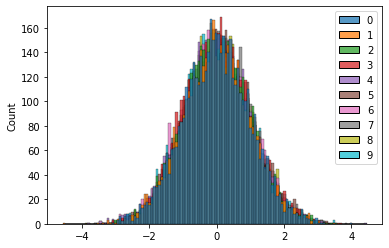

In [4]:
# all data is standard distribution
sns.histplot(X)


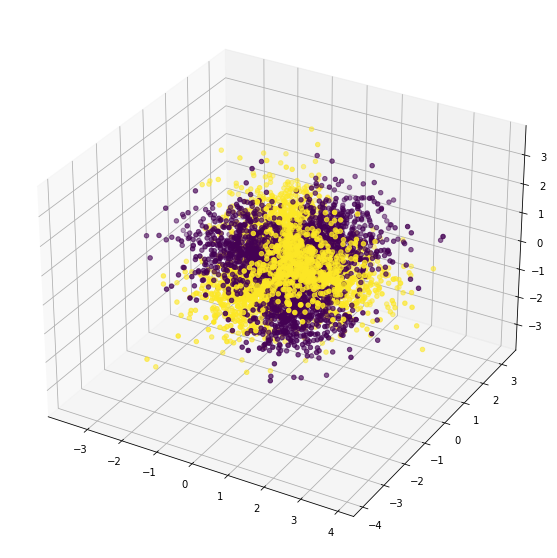

In [5]:
# %matplotlib notebook
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

xline = X[:,-3]
yline = X[:,-2]
zline = X[:,-1]

ax.scatter3D(xline, yline, zline, c = Y)



#### Important point to notice
 - In above scenario, timestep is 10.
 - Patterns are added in the end of the timestep at -1,-2,-3 index positions. so it is comparetively easy to learn from NN point of view.
 - Whereas, if patterns are at starting of timesteps, at 0,1,2 index positions then definitely it will be harder for NN to learn from, and it tends to forget things. 
 - Additionaly, if T increases that also give extra burden to NN to learn from more.
 - We will see this nature in upcoming code results.

# Try a linear model first

In [14]:
i = Input(shape = (T,))
x = Dense(1, activation= 'sigmoid')(i)

model = Model(i,x)

model.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=0.01),
            metrics=['accuracy']
             )



<img src='21stfeb_linear_model.jpg' width="300" height="600"	>

In [15]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [16]:
# train

r_ann_s = model.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 2s 9ms/step - loss: 0.8527 - accuracy: 0.5046 - val_loss: 0.6972 - val_accuracy: 0.4807
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5240 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5210 - val_loss: 0.6911 - val_accuracy: 0.5320
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4789 - val_loss: 0.6937 - val_accuracy: 0.5113
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4971 - val_loss: 0.6921 - val_accuracy: 0.5080
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5006 - val_loss: 0.6933 - val_accuracy: 0.5127
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5183 - val_loss: 0.6915 - val_accuracy: 0.5147

Epoch 58/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5294 - val_loss: 0.6947 - val_accuracy: 0.4993
Epoch 59/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4919 - val_loss: 0.6973 - val_accuracy: 0.4893
Epoch 60/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.5133 - val_loss: 0.6935 - val_accuracy: 0.5187
Epoch 61/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5189 - val_loss: 0.6927 - val_accuracy: 0.5060
Epoch 62/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5066 - val_loss: 0.6920 - val_accuracy: 0.5100
Epoch 63/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5089 - val_loss: 0.6933 - val_accuracy: 0.5200
Epoch 64/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.4908 - val_loss: 0.6918 - val_accuracy:

<IPython.core.display.Javascript object>


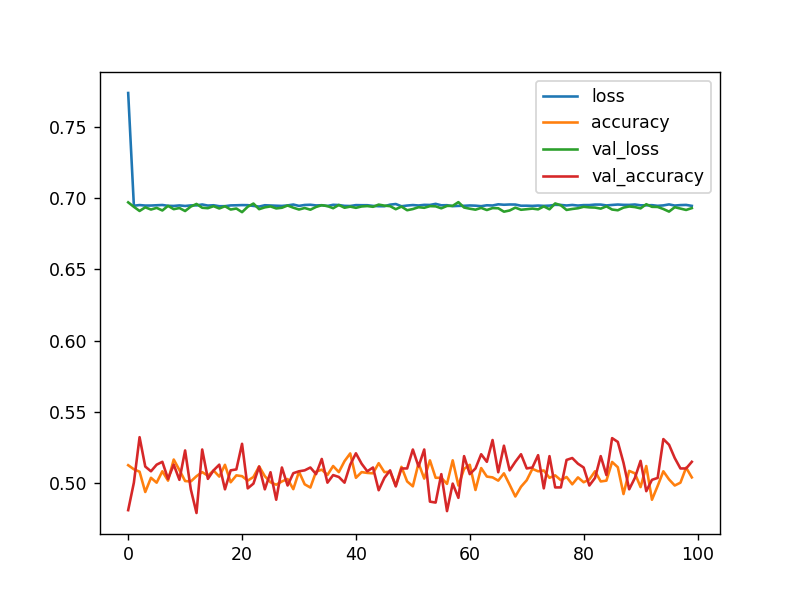

<AxesSubplot:>

In [18]:
# plot the losses and accuracy

pd.DataFrame(r_ann_s.history).plot()

### ANN results are not promising, accuracy vary around 50%

-------


# SimpleRNN for short distance

In [19]:
i = Input(shape = (T,D))
x = SimpleRNN(5)(i)

x = Dense(1, activation = 'sigmoid')(x)

model_rnn = Model(i,x)
model_rnn.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_rnn.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### Below FOR loop explains what happens inside the rnn layer

- Take an exmaple of simple RNN which has 10 timesteps with 1 feature each and output layer has 1 neuron.

- *T* is timestep
- *D* is feature dimension for each timestep
- *h_0* is initial hidden state( the very first one) : may be zero
- *x_t* is the feature values(with D dimension) at _t_
- *h_t*  is hidden state at *t*
- *h_last* is hidden state at *t-1*
- *y_hat* is calculated output which will be used to find the loss
- *w_x_h* is weight between input layer and rnn hidden layer
- *w_h_h* is weight between hidden and hidden layer(with itself)
- *b_h* is bias with respect to hidden layer
- *b_o* is bias with respect to output layer

<img src = 'rnn equations.jpg'>

So if we explain in words this FOR loop it goes like:
1. There would be many samples(N), but for one sample there would be one input vector.
2. Input vector ( T * D ) for first sample.
3. Above FOR loop would run T times to send cooresponding *x_t* value to the simplernn layer.

In [20]:
# train

rnn_s = model_rnn.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 4s 22ms/step - loss: 0.7024 - accuracy: 0.5279 - val_loss: 0.6260 - val_accuracy: 0.7313
Epoch 2/100
110/110 [==============================] - 2s 20ms/step - loss: 0.5881 - accuracy: 0.7628 - val_loss: 0.4542 - val_accuracy: 0.8493
Epoch 3/100
110/110 [==============================] - 2s 19ms/step - loss: 0.4195 - accuracy: 0.8607 - val_loss: 0.3260 - val_accuracy: 0.8940
Epoch 4/100
110/110 [==============================] - 2s 19ms/step - loss: 0.3079 - accuracy: 0.9101 - val_loss: 0.2500 - val_accuracy: 0.9273
Epoch 5/100
110/110 [==============================] - 2s 20ms/step - loss: 0.2353 - accuracy: 0.9337 - val_loss: 0.2094 - val_accuracy: 0.9533
Epoch 6/100
110/110 [==============================] - 2s 19ms/step - loss: 0.2023 - accuracy: 0.9489 - val_loss: 0.1805 - val_accuracy: 0.9573
Epoch 7/100
110/110 [==============================] - 2s 19ms/step - loss: 0.1632 - accuracy: 0.9647 - val_loss: 0.1569 - val_accuracy:

<IPython.core.display.Javascript object>


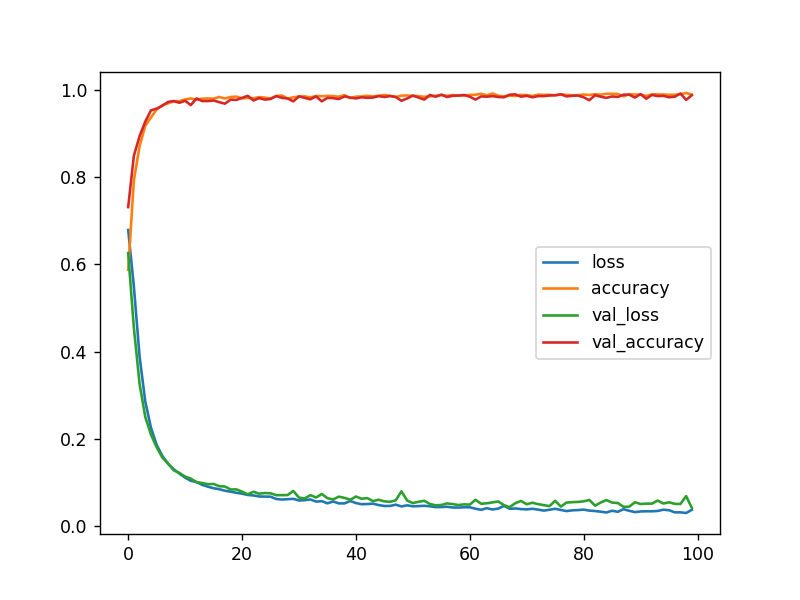

<AxesSubplot:>

In [21]:
# plot the losses and accuracy

pd.DataFrame(rnn_s.history).plot()

In [22]:
X.shape , Y.shape  # actually i should have changed the shape of X before training. But even 2d array it took. 
# it should have been (5000,10,1). it may give error when D is greater than 1.

((5000, 10), (5000,))

### Conclusion after Linear(ANN) and SimpleRNN execution

- Data had very short distance pattern. It was just at ( -3,-2,-1) index.
- ANN could not perform well. It was just around 50%.
- However, SimpleRNN performs exremely good. Accuracy around 98%.
- **SimpleRNN** picked the short distance patterns nicely.

-----

## Recreating the dataset ( Lond Distance patterns) 
 - Dataset with patterns at starting of each timestep 
 
 <a id = 'll10'></a>

In [23]:

# we are building the dataset:
# This is nonlinear and long-distance patterns


# lets start with timestep as 10, later we may increase it to see how long NN 
# is able to learn the variations.

T = 10
D = 1       # feature
X = []
Y = []


# below code is written to create the patterns in the data.
# only last 3 items in each timesteps has the pattern, hence short distance
# later for long distance, firt 3 items will create the pattern.

def get_label(x, i1,i2,i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0


for t in range(5000):
    x = np.random.randn(T)
    X.append(x)  
#     y = get_label(x, -1,-2,-3)   # pattern at short distance
    y = get_label(x, 0, 1, 2 )   # pattern at long distance
    
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape, Y.shape)
    

(5000, 10) (5000,)


# Try a linear model first

In [24]:
i = Input(shape = (T,))
x = Dense(1, activation= 'sigmoid')(i)

model = Model(i,x)

model.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=0.01),
            metrics=['accuracy']
             )



In [25]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [26]:
# train

r_ann_l = model.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 1s 6ms/step - loss: 0.8566 - accuracy: 0.4867 - val_loss: 0.6948 - val_accuracy: 0.5113
Epoch 2/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.4984 - val_loss: 0.6948 - val_accuracy: 0.5207
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5281 - val_loss: 0.6940 - val_accuracy: 0.4767
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5152 - val_loss: 0.6957 - val_accuracy: 0.4933
Epoch 5/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5016 - val_loss: 0.6949 - val_accuracy: 0.4973
Epoch 6/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6966 - accuracy: 0.4753 - val_loss: 0.6961 - val_accuracy: 0.5180
Epoch 7/100
110/110 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.5031 - val_loss: 0.6953 - val_accuracy: 0.4880

Epoch 58/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6972 - accuracy: 0.4862 - val_loss: 0.6945 - val_accuracy: 0.4973
Epoch 59/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5084 - val_loss: 0.6943 - val_accuracy: 0.5073
Epoch 60/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5093 - val_loss: 0.6953 - val_accuracy: 0.4607
Epoch 61/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.4867 - val_loss: 0.6959 - val_accuracy: 0.5293
Epoch 62/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6950 - accuracy: 0.5144 - val_loss: 0.6951 - val_accuracy: 0.5100
Epoch 63/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.5028 - val_loss: 0.6939 - val_accuracy: 0.5127
Epoch 64/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5118 - val_loss: 0.6965 - val_accuracy:

<IPython.core.display.Javascript object>


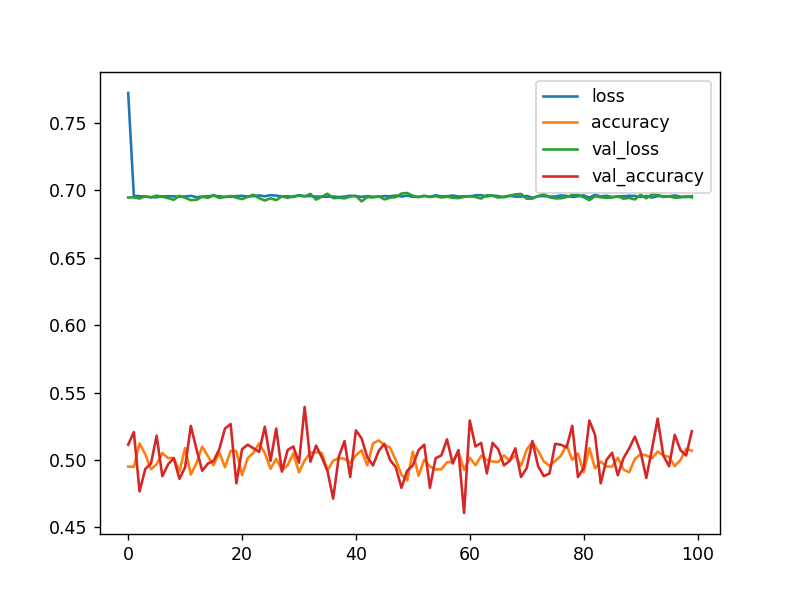

<AxesSubplot:>

In [27]:
# plot the losses and accuracy

pd.DataFrame(r_ann_l.history).plot()

#### Still accuracy is below 50% for ANN model. 

-----

## SimpleRNN for long distance

In [28]:
i = Input(shape = (T,D))
x = SimpleRNN(5)(i)

x = Dense(1, activation = 'sigmoid')(x)

model_rnn = Model(i,x)
model_rnn.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_rnn.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [29]:
X = np.expand_dims(X, -1)

In [30]:
X.shape

(5000, 10, 1)

In [31]:
rnn_l = model_rnn.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 3s 22ms/step - loss: 0.7431 - accuracy: 0.5031 - val_loss: 0.6943 - val_accuracy: 0.4987
Epoch 2/100
110/110 [==============================] - 2s 20ms/step - loss: 0.6966 - accuracy: 0.5135 - val_loss: 0.6977 - val_accuracy: 0.4920
Epoch 3/100
110/110 [==============================] - 2s 21ms/step - loss: 0.6955 - accuracy: 0.5054 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 4/100
110/110 [==============================] - 2s 22ms/step - loss: 0.6941 - accuracy: 0.4922 - val_loss: 0.6913 - val_accuracy: 0.5187
Epoch 5/100
110/110 [==============================] - 2s 21ms/step - loss: 0.6919 - accuracy: 0.5156 - val_loss: 0.6961 - val_accuracy: 0.4827
Epoch 6/100
110/110 [==============================] - 2s 22ms/step - loss: 0.6936 - accuracy: 0.5098 - val_loss: 0.6880 - val_accuracy: 0.5440
Epoch 7/100
110/110 [==============================] - 2s 21ms/step - loss: 0.6906 - accuracy: 0.5218 - val_loss: 0.6932 - val_accuracy:

<IPython.core.display.Javascript object>


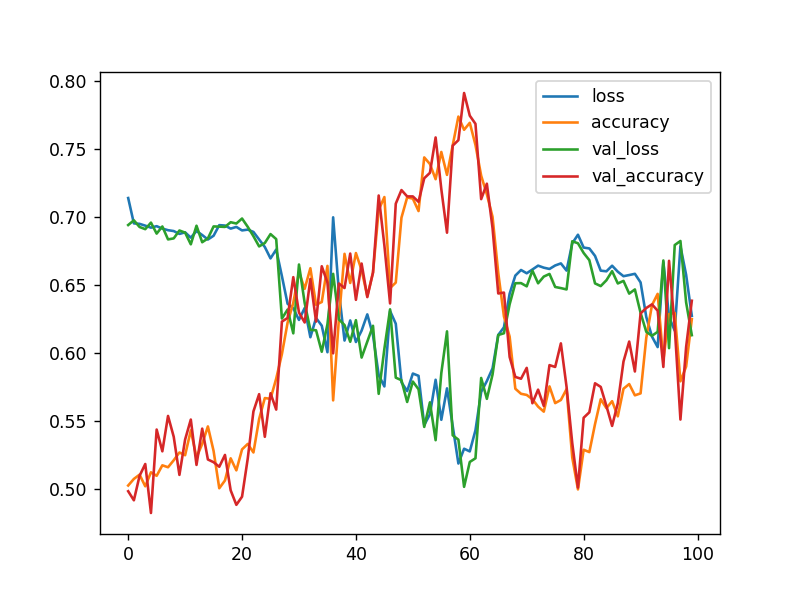

<AxesSubplot:>

In [32]:
pd.DataFrame(rnn_l.history).plot()

### Conclusion from Large distance results on simpleRNN and linear

- Linear results still at 50%
- SimpleRNN which was quite good with short distance data, are now showing not stable results. 
- Reaching 80% thn coming down. 
- So for long distance data, simpleRNN is also not reliable.

# LSTM on long distance

In [33]:
i = Input(shape = (T,D))
x = LSTM(5)(i)

x = Dense(1, activation = 'sigmoid')(x)

model_lstm = Model(i,x)
model_lstm.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_lstm.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [34]:
lstm_l = model_lstm.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 4s 9ms/step - loss: 0.6955 - accuracy: 0.4856 - val_loss: 0.6929 - val_accuracy: 0.5173
Epoch 2/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6939 - accuracy: 0.4834 - val_loss: 0.6930 - val_accuracy: 0.5160
Epoch 3/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6941 - accuracy: 0.5163 - val_loss: 0.6924 - val_accuracy: 0.5160
Epoch 4/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6939 - accuracy: 0.4957 - val_loss: 0.6925 - val_accuracy: 0.5147
Epoch 5/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6934 - accuracy: 0.4994 - val_loss: 0.6930 - val_accuracy: 0.4967
Epoch 6/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6934 - accuracy: 0.4953 - val_loss: 0.6922 - val_accuracy: 0.5187
Epoch 7/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.5077 - val_loss: 0.6930 - val_accuracy: 0.5153

Epoch 58/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0640 - accuracy: 0.9788 - val_loss: 0.0857 - val_accuracy: 0.9727
Epoch 59/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0888 - accuracy: 0.9722 - val_loss: 0.0494 - val_accuracy: 0.9840
Epoch 60/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0663 - accuracy: 0.9790 - val_loss: 0.0653 - val_accuracy: 0.9793
Epoch 61/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0542 - accuracy: 0.9845 - val_loss: 0.0649 - val_accuracy: 0.9767
Epoch 62/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0658 - accuracy: 0.9807 - val_loss: 0.0726 - val_accuracy: 0.9747
Epoch 63/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0670 - accuracy: 0.9782 - val_loss: 0.0551 - val_accuracy: 0.9840
Epoch 64/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0537 - accuracy: 0.9819 - val_loss: 0.0609 - val_accuracy:

<IPython.core.display.Javascript object>


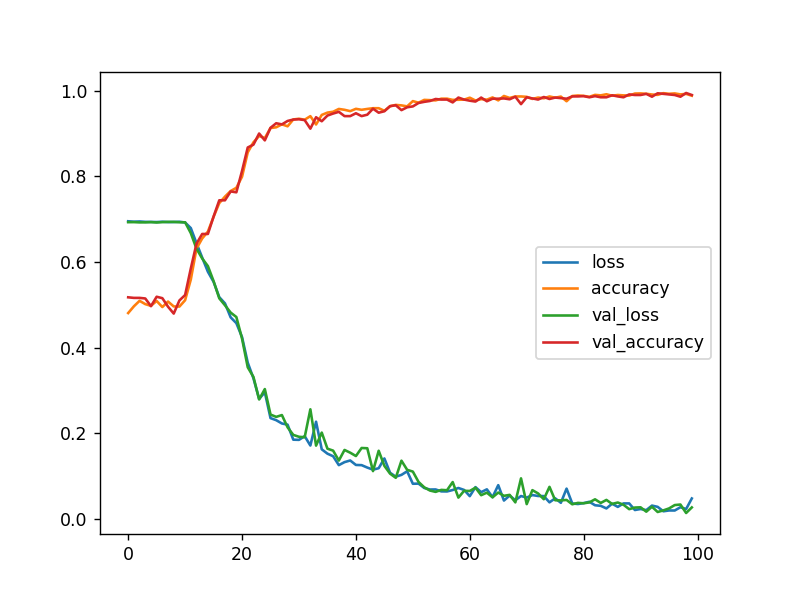

<AxesSubplot:>

In [35]:
pd.DataFrame(lstm_l.history).plot()

### Conclusion:
- LSTM shows pretty good results with Long Distance data
- it is expected as LSTM are made to pick the long distant patterns

------


# Sequence length = 20 
 <a id = 'll20'></a>

### Now we make the problem even harder by increasing the sequence length (timestep size)

### ANN


In [37]:
# we are building the dataset:
# This is nonlinear and short-distance patterns


# lets start with timestep as 10, later we may increase it to see how long NN 
# is able to learn the variations.


T = 20
D = 1       # feature
X = []
Y = []


# below code is written to create the patterns in the data.
# only last 3 items in each timesteps has the pattern, hence short distance
# later for long distance, firt 3 items will create the pattern.

def get_label(x, i1,i2,i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0


for t in range(5000):
    x = np.random.randn(T)
    X.append(x)  
#     y = get_label(x, -1,-2,-3)   # pattern at short distance
    y = get_label(x, 0, 1, 2 )   # pattern at long distance
    
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape, Y.shape)
    

(5000, 20) (5000,)


In [38]:
i = Input(shape = (T,))
x = Dense(1, activation= 'sigmoid')(i)

model = Model(i,x)

model.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=0.01),
            metrics=['accuracy']
             )


In [39]:
ann_l_20 = model.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 1s 4ms/step - loss: 0.7924 - accuracy: 0.4858 - val_loss: 0.6981 - val_accuracy: 0.5080
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5024 - val_loss: 0.6963 - val_accuracy: 0.5133
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.4892 - val_loss: 0.6956 - val_accuracy: 0.5107
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4963 - val_loss: 0.6941 - val_accuracy: 0.5107
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5085 - val_loss: 0.6978 - val_accuracy: 0.4760
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4968 - val_loss: 0.6960 - val_accuracy: 0.5147
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5094 - val_loss: 0.6939 - val_accuracy: 0.5193

Epoch 58/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5153
Epoch 59/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5068 - val_loss: 0.6953 - val_accuracy: 0.5133
Epoch 60/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.5083 - val_loss: 0.6954 - val_accuracy: 0.5053
Epoch 61/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5109 - val_loss: 0.6973 - val_accuracy: 0.4967
Epoch 62/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6970 - accuracy: 0.4958 - val_loss: 0.6923 - val_accuracy: 0.5147
Epoch 63/100
110/110 [==============================] - 0s 5ms/step - loss: 0.6999 - accuracy: 0.4871 - val_loss: 0.6952 - val_accuracy: 0.5133
Epoch 64/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.5057 - val_loss: 0.6962 - val_accuracy:

<IPython.core.display.Javascript object>


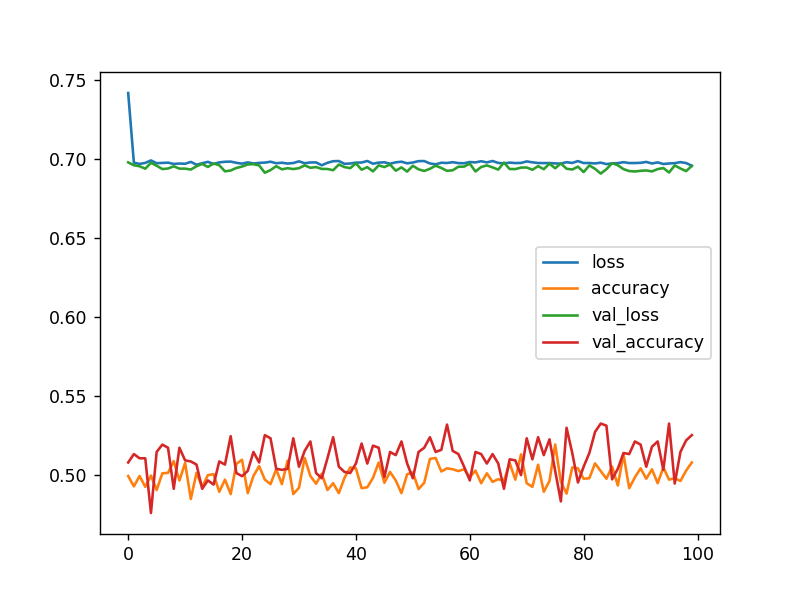

<AxesSubplot:>

In [40]:
pd.DataFrame(ann_l_20.history).plot()

# SimpleRNN for T = 20 and long distant patterns

In [41]:
i = Input(shape = (T,D))
x = SimpleRNN(5)(i)

x = Dense(1, activation = 'sigmoid')(x)

model_rnn = Model(i,x)
model_rnn.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_rnn.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 20, 1)]           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [42]:
X = np.expand_dims(X, -1)

In [43]:
rnn_l_20 = model_rnn.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 4s 28ms/step - loss: 0.7198 - accuracy: 0.5145 - val_loss: 0.6964 - val_accuracy: 0.4813
Epoch 2/100
110/110 [==============================] - 3s 27ms/step - loss: 0.6957 - accuracy: 0.4775 - val_loss: 0.6961 - val_accuracy: 0.4980
Epoch 3/100
110/110 [==============================] - 3s 29ms/step - loss: 0.6931 - accuracy: 0.5225 - val_loss: 0.6934 - val_accuracy: 0.5027
Epoch 4/100
110/110 [==============================] - 3s 30ms/step - loss: 0.6943 - accuracy: 0.4994 - val_loss: 0.6935 - val_accuracy: 0.5273
Epoch 5/100
110/110 [==============================] - 3s 32ms/step - loss: 0.6947 - accuracy: 0.4982 - val_loss: 0.6933 - val_accuracy: 0.4973
Epoch 6/100
110/110 [==============================] - 4s 33ms/step - loss: 0.6937 - accuracy: 0.5037 - val_loss: 0.6931 - val_accuracy: 0.5133
Epoch 7/100
110/110 [==============================] - 4s 32ms/step - loss: 0.6939 - accuracy: 0.5005 - val_loss: 0.6929 - val_accuracy:

<IPython.core.display.Javascript object>


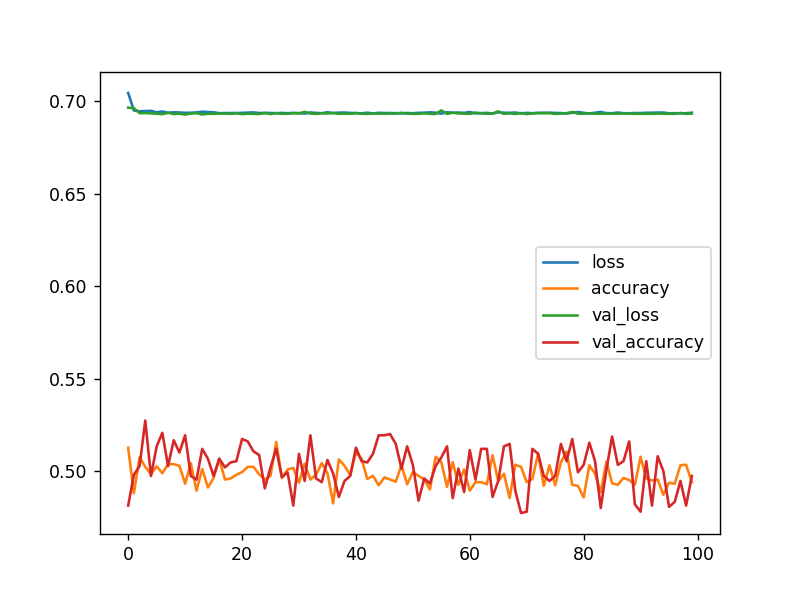

<AxesSubplot:>

In [54]:
pd.DataFrame(rnn_l_20.history).plot()

# LSTM for T = 20 and long distant patterns

In [45]:
i = Input(shape = (T,D))
x = LSTM(5)(i)

x = Dense(1, activation = 'sigmoid')(x)

model_lstm = Model(i,x)
model_lstm.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_lstm.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 20, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [46]:
lstm_l_20 = model_lstm.fit(X,Y, epochs = 100,
             validation_split=0.3
             )


Epoch 1/100
110/110 [==============================] - 3s 13ms/step - loss: 0.6943 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5153
Epoch 2/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.4888 - val_loss: 0.6934 - val_accuracy: 0.5080
Epoch 3/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.5018 - val_loss: 0.6930 - val_accuracy: 0.5013
Epoch 4/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6942 - accuracy: 0.4839 - val_loss: 0.6932 - val_accuracy: 0.4893
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.5043 - val_loss: 0.6934 - val_accuracy: 0.5140
Epoch 6/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.4874 - val_loss: 0.6933 - val_accuracy: 0.5060
Epoch 7/100
110/110 [==============================] - 1s 9ms/step - loss: 0.6939 - accuracy: 0.4971 - val_loss: 0.6931 - val_accuracy: 0.492

Epoch 58/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5348 - accuracy: 0.7390 - val_loss: 0.5185 - val_accuracy: 0.7407
Epoch 59/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5308 - accuracy: 0.7364 - val_loss: 0.5188 - val_accuracy: 0.7553
Epoch 60/100
110/110 [==============================] - 1s 9ms/step - loss: 0.4868 - accuracy: 0.7779 - val_loss: 0.4911 - val_accuracy: 0.7733
Epoch 61/100
110/110 [==============================] - 1s 9ms/step - loss: 0.4552 - accuracy: 0.8044 - val_loss: 0.4483 - val_accuracy: 0.8047
Epoch 62/100
110/110 [==============================] - 1s 8ms/step - loss: 0.4337 - accuracy: 0.8006 - val_loss: 0.3644 - val_accuracy: 0.8320
Epoch 63/100
110/110 [==============================] - 1s 8ms/step - loss: 0.3579 - accuracy: 0.8364 - val_loss: 0.3287 - val_accuracy: 0.8487
Epoch 64/100
110/110 [==============================] - 1s 8ms/step - loss: 0.3050 - accuracy: 0.8707 - val_loss: 0.2537 - val_accuracy:

<IPython.core.display.Javascript object>


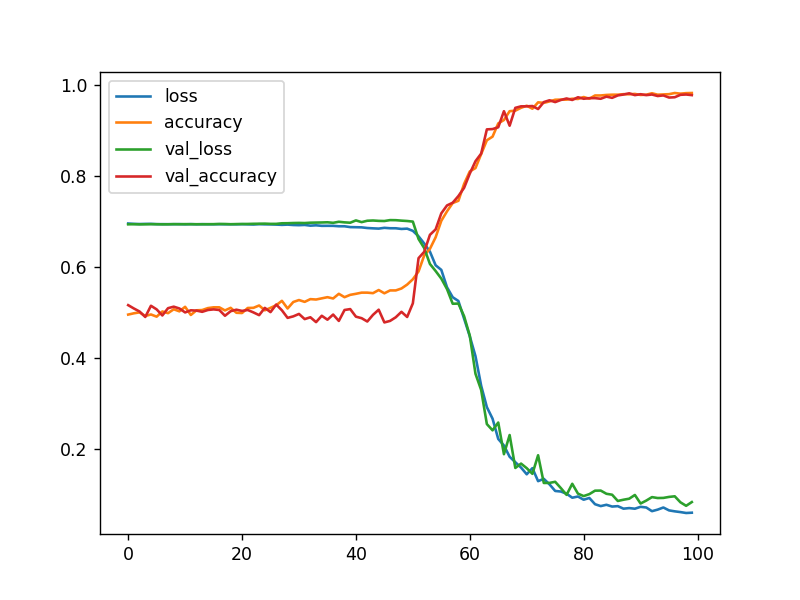

<AxesSubplot:>

In [53]:
pd.DataFrame(lstm_l_20.history).plot()

# GRU for T = 20 and long distant patterns

In [48]:
i = Input(shape = (T,D))
x = GRU(5)(i)

x = Dense(1, activation = 'sigmoid')(x)

model_gru = Model(i,x)
model_gru.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_gru.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 20, 1)]           0         
_________________________________________________________________
gru (GRU)                    (None, 5)                 120       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [49]:
gru_l_20 = model_gru.fit(X,Y, epochs = 100,
             validation_split=0.3
             )


Epoch 1/100
110/110 [==============================] - 4s 11ms/step - loss: 0.6969 - accuracy: 0.4820 - val_loss: 0.6946 - val_accuracy: 0.4940
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6940 - accuracy: 0.4936 - val_loss: 0.6939 - val_accuracy: 0.4973
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6940 - accuracy: 0.4985 - val_loss: 0.6935 - val_accuracy: 0.4960
Epoch 4/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6943 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4953
Epoch 5/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.4993
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.5070 - val_loss: 0.6930 - val_accuracy: 0.5053
Epoch 7/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6941 - accuracy: 0.4941 - val_loss: 0.6932 - val_accuracy: 0.489

Epoch 58/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6890 - accuracy: 0.5342 - val_loss: 0.6940 - val_accuracy: 0.5087
Epoch 59/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6870 - accuracy: 0.5402 - val_loss: 0.6934 - val_accuracy: 0.5073
Epoch 60/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6874 - accuracy: 0.5334 - val_loss: 0.6953 - val_accuracy: 0.5087
Epoch 61/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6874 - accuracy: 0.5490 - val_loss: 0.6966 - val_accuracy: 0.5067
Epoch 62/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6857 - accuracy: 0.5516 - val_loss: 0.6985 - val_accuracy: 0.5113
Epoch 63/100
110/110 [==============================] - 1s 9ms/step - loss: 0.6891 - accuracy: 0.5414 - val_loss: 0.6950 - val_accuracy: 0.5007
Epoch 64/100
110/110 [==============================] - 1s 9ms/step - loss: 0.6868 - accuracy: 0.5326 - val_loss: 0.6957 - val_accuracy:

<IPython.core.display.Javascript object>


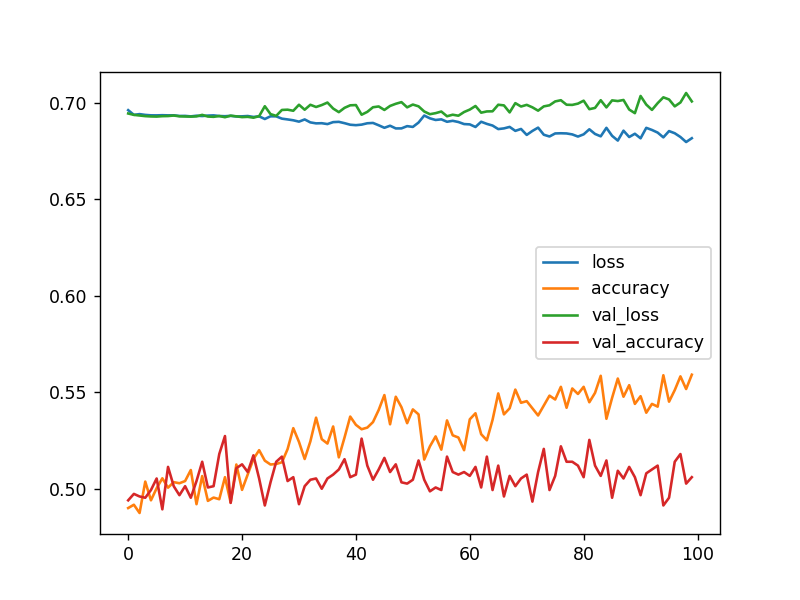

<AxesSubplot:>

In [51]:
pd.DataFrame(gru_l_20.history).plot()

### Conclusion: sequence length 20 and long distance
- simple ANN again not good
- SimpleRNN also performed badly
- LSTM is good
- GRU also not up to the mark.


### Sequence length = 30
 <a id = 'll30'></a>
### Now we make the problem even harder by increasing the sequence length (timestep size)

### ANN


In [55]:
# we are building the dataset:
# This is nonlinear and short-distance patterns


# lets start with timestep as 10, later we may increase it to see how long NN 
# is able to learn the variations.


T = 30
D = 1       # feature
X = []
Y = []


# below code is written to create the patterns in the data.
# only last 3 items in each timesteps has the pattern, hence short distance
# later for long distance, firt 3 items will create the pattern.

def get_label(x, i1,i2,i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0


for t in range(5000):
    x = np.random.randn(T)
    X.append(x)  
#     y = get_label(x, -1,-2,-3)   # pattern at short distance
    y = get_label(x, 0, 1, 2 )   # pattern at long distance
    
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape, Y.shape)
    

(5000, 30) (5000,)


In [56]:
i = Input(shape = (T,))
x = Dense(1, activation= 'sigmoid')(i)

model = Model(i,x)

model.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=0.01),
            metrics=['accuracy']
             )


In [57]:
ann_l_30 = model.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 1s 4ms/step - loss: 0.8227 - accuracy: 0.4957 - val_loss: 0.6997 - val_accuracy: 0.4907
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5236 - val_loss: 0.6952 - val_accuracy: 0.5273
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.5054 - val_loss: 0.6987 - val_accuracy: 0.5007
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.5232 - val_loss: 0.6958 - val_accuracy: 0.5107
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5241 - val_loss: 0.6973 - val_accuracy: 0.5093
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5093 - val_loss: 0.6969 - val_accuracy: 0.5013
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5296 - val_loss: 0.6951 - val_accuracy: 0.5107

Epoch 58/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5234 - val_loss: 0.6971 - val_accuracy: 0.5213
Epoch 59/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.5104 - val_loss: 0.6978 - val_accuracy: 0.4993
Epoch 60/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6956 - accuracy: 0.5132 - val_loss: 0.6957 - val_accuracy: 0.5160
Epoch 61/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6999 - accuracy: 0.4945 - val_loss: 0.7000 - val_accuracy: 0.5033
Epoch 62/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6981 - accuracy: 0.5030 - val_loss: 0.6968 - val_accuracy: 0.5040
Epoch 63/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6945 - accuracy: 0.5308 - val_loss: 0.7000 - val_accuracy: 0.5053
Epoch 64/100
110/110 [==============================] - 1s 5ms/step - loss: 0.6997 - accuracy: 0.5157 - val_loss: 0.6982 - val_accuracy:

<IPython.core.display.Javascript object>


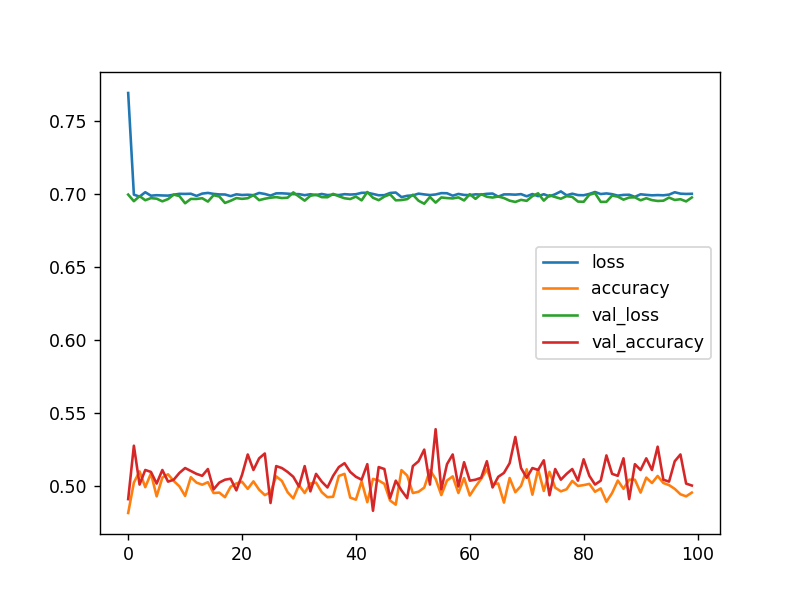

<AxesSubplot:>

In [58]:
pd.DataFrame(ann_l_30.history).plot()

# SimpleRNN for T = 30 and long distant patterns

In [59]:
i = Input(shape = (T,D))
x = SimpleRNN(5)(i)

x = Dense(1, activation = 'sigmoid')(x)

model_rnn = Model(i,x)
model_rnn.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_rnn.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 30, 1)]           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [60]:
X = np.expand_dims(X, -1)

In [61]:
rnn_l_30 = model_rnn.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 6s 45ms/step - loss: 0.7137 - accuracy: 0.5012 - val_loss: 0.6934 - val_accuracy: 0.5040
Epoch 2/100
110/110 [==============================] - 5s 47ms/step - loss: 0.6918 - accuracy: 0.5275 - val_loss: 0.6932 - val_accuracy: 0.4987
Epoch 3/100
110/110 [==============================] - 5s 48ms/step - loss: 0.6943 - accuracy: 0.4943 - val_loss: 0.6932 - val_accuracy: 0.5087
Epoch 4/100
110/110 [==============================] - 5s 49ms/step - loss: 0.6921 - accuracy: 0.5219 - val_loss: 0.6932 - val_accuracy: 0.5067
Epoch 5/100
110/110 [==============================] - 5s 50ms/step - loss: 0.6930 - accuracy: 0.5255 - val_loss: 0.6935 - val_accuracy: 0.5220
Epoch 6/100
110/110 [==============================] - 6s 51ms/step - loss: 0.6919 - accuracy: 0.5150 - val_loss: 0.6947 - val_accuracy: 0.4953
Epoch 7/100
110/110 [==============================] - 6s 55ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6972 - val_accuracy:

<IPython.core.display.Javascript object>


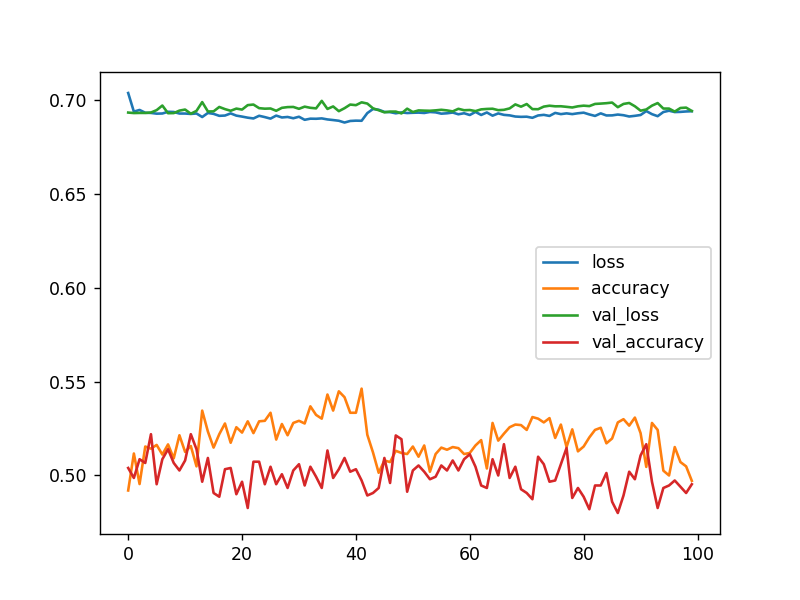

<AxesSubplot:>

In [64]:
pd.DataFrame(rnn_l_30.history).plot()

# LSTM for T = 30 and long distant patterns

In [65]:
i = Input(shape = (T,D))
x = LSTM(5)(i)

x = Dense(1, activation = 'sigmoid')(x)

model_lstm = Model(i,x)
model_lstm.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_lstm.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 30, 1)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [66]:
lstm_l_30 = model_lstm.fit(X,Y, epochs = 100,
             validation_split=0.3
             )


Epoch 1/100
110/110 [==============================] - 3s 11ms/step - loss: 0.6987 - accuracy: 0.4875 - val_loss: 0.6926 - val_accuracy: 0.5013
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.5150 - val_loss: 0.6928 - val_accuracy: 0.5047
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5021 - val_loss: 0.6927 - val_accuracy: 0.5187
Epoch 4/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6935 - accuracy: 0.4884 - val_loss: 0.6932 - val_accuracy: 0.4833
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.4920
Epoch 6/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6929 - accuracy: 0.4993 - val_loss: 0.6928 - val_accuracy: 0.5087
Epoch 7/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5086 - val_loss: 0.6929 - val_accuracy: 0.516

Epoch 58/100
110/110 [==============================] - 1s 10ms/step - loss: 0.6781 - accuracy: 0.5394 - val_loss: 0.6755 - val_accuracy: 0.5267
Epoch 59/100
110/110 [==============================] - 1s 11ms/step - loss: 0.6761 - accuracy: 0.5577 - val_loss: 0.6691 - val_accuracy: 0.5560
Epoch 60/100
110/110 [==============================] - 1s 11ms/step - loss: 0.6720 - accuracy: 0.5572 - val_loss: 0.6625 - val_accuracy: 0.5613
Epoch 61/100
110/110 [==============================] - 1s 11ms/step - loss: 0.6617 - accuracy: 0.5674 - val_loss: 0.6606 - val_accuracy: 0.5560
Epoch 62/100
110/110 [==============================] - 1s 11ms/step - loss: 0.6557 - accuracy: 0.5757 - val_loss: 0.6593 - val_accuracy: 0.5633
Epoch 63/100
110/110 [==============================] - 1s 11ms/step - loss: 0.6642 - accuracy: 0.5449 - val_loss: 0.6568 - val_accuracy: 0.5387
Epoch 64/100
110/110 [==============================] - 1s 11ms/step - loss: 0.6512 - accuracy: 0.5715 - val_loss: 0.6408 - val_ac

<IPython.core.display.Javascript object>


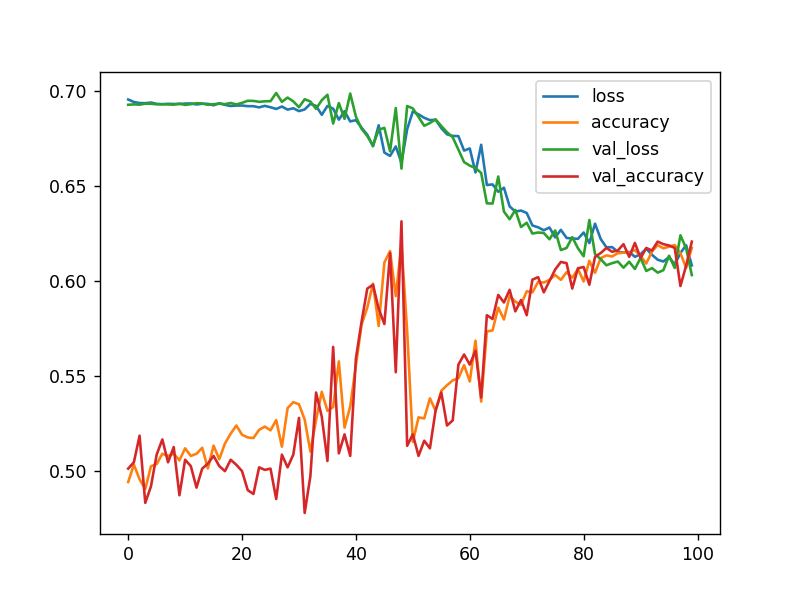

<AxesSubplot:>

In [67]:
pd.DataFrame(lstm_l_30.history).plot()

# GRU for T = 30 and long distant patterns

In [68]:
i = Input(shape = (T,D))
x = GRU(5)(i)

x = Dense(1, activation = 'sigmoid')(x)

model_gru = Model(i,x)
model_gru.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_gru.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 30, 1)]           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 5)                 120       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [71]:
gru_l_30 = model_gru.fit(X,Y, epochs = 500,
             validation_split=0.3
             )


Epoch 1/500
110/110 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5049 - val_loss: 0.6940 - val_accuracy: 0.4927
Epoch 2/500
110/110 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.5003 - val_loss: 0.6941 - val_accuracy: 0.4893
Epoch 3/500
110/110 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.5094 - val_loss: 0.6951 - val_accuracy: 0.4940
Epoch 4/500
110/110 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.5094 - val_loss: 0.6968 - val_accuracy: 0.4960
Epoch 5/500
110/110 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6943 - val_accuracy: 0.4973
Epoch 6/500
110/110 [==============================] - 1s 8ms/step - loss: 0.6943 - accuracy: 0.5020 - val_loss: 0.6944 - val_accuracy: 0.4947
Epoch 7/500
110/110 [==============================] - 1s 7ms/step - loss: 0.6940 - accuracy: 0.4974 - val_loss: 0.6943 - val_accuracy: 0.4920

Epoch 58/500
110/110 [==============================] - 1s 8ms/step - loss: 0.5958 - accuracy: 0.6046 - val_loss: 0.6026 - val_accuracy: 0.5827
Epoch 59/500
110/110 [==============================] - 1s 8ms/step - loss: 0.5895 - accuracy: 0.6137 - val_loss: 0.5844 - val_accuracy: 0.6060
Epoch 60/500
110/110 [==============================] - 1s 8ms/step - loss: 0.5788 - accuracy: 0.6123 - val_loss: 0.5810 - val_accuracy: 0.5967
Epoch 61/500
110/110 [==============================] - 1s 8ms/step - loss: 0.5936 - accuracy: 0.6160 - val_loss: 0.5849 - val_accuracy: 0.6133
Epoch 62/500
110/110 [==============================] - 1s 8ms/step - loss: 0.5756 - accuracy: 0.6269 - val_loss: 0.5761 - val_accuracy: 0.6193
Epoch 63/500
110/110 [==============================] - 1s 8ms/step - loss: 0.5704 - accuracy: 0.6229 - val_loss: 0.5755 - val_accuracy: 0.6060
Epoch 64/500
110/110 [==============================] - 1s 8ms/step - loss: 0.5669 - accuracy: 0.6214 - val_loss: 0.5695 - val_accuracy:

Epoch 115/500
110/110 [==============================] - 1s 8ms/step - loss: 0.4153 - accuracy: 0.8246 - val_loss: 0.4045 - val_accuracy: 0.8247
Epoch 116/500
110/110 [==============================] - 1s 9ms/step - loss: 0.3967 - accuracy: 0.8349 - val_loss: 0.3859 - val_accuracy: 0.8460
Epoch 117/500
110/110 [==============================] - 1s 9ms/step - loss: 0.4085 - accuracy: 0.8271 - val_loss: 0.4057 - val_accuracy: 0.8460
Epoch 118/500
110/110 [==============================] - 1s 9ms/step - loss: 0.4517 - accuracy: 0.8271 - val_loss: 1.0391 - val_accuracy: 0.6480
Epoch 119/500
110/110 [==============================] - 1s 9ms/step - loss: 0.6356 - accuracy: 0.6523 - val_loss: 0.4244 - val_accuracy: 0.8093
Epoch 120/500
110/110 [==============================] - 1s 9ms/step - loss: 0.3805 - accuracy: 0.8560 - val_loss: 0.3770 - val_accuracy: 0.8707
Epoch 121/500
110/110 [==============================] - 1s 9ms/step - loss: 0.3468 - accuracy: 0.8860 - val_loss: 0.3557 - val_ac

110/110 [==============================] - 1s 8ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0166 - val_accuracy: 0.9960
Epoch 228/500
110/110 [==============================] - 1s 8ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0158 - val_accuracy: 0.9960
Epoch 229/500
110/110 [==============================] - 1s 8ms/step - loss: 0.0095 - accuracy: 0.9963 - val_loss: 0.0154 - val_accuracy: 0.9947
Epoch 230/500
110/110 [==============================] - 1s 8ms/step - loss: 0.0595 - accuracy: 0.9857 - val_loss: 0.0367 - val_accuracy: 0.9927
Epoch 231/500
110/110 [==============================] - 1s 8ms/step - loss: 0.0214 - accuracy: 0.9943 - val_loss: 0.0137 - val_accuracy: 0.9947
Epoch 232/500
110/110 [==============================] - 1s 8ms/step - loss: 0.0124 - accuracy: 0.9957 - val_loss: 0.0162 - val_accuracy: 0.9960
Epoch 233/500
110/110 [==============================] - 1s 8ms/step - loss: 0.0266 - accuracy: 0.9937 - val_loss: 0.0304 - val_accuracy: 0.9920

110/110 [==============================] - 1s 9ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0062 - val_accuracy: 0.9973
Epoch 340/500
110/110 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0030 - val_accuracy: 0.9980
Epoch 341/500
110/110 [==============================] - 1s 9ms/step - loss: 0.0018 - accuracy: 0.9989 - val_loss: 0.0058 - val_accuracy: 0.9973
Epoch 342/500
110/110 [==============================] - 1s 9ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.0079 - val_accuracy: 0.9967
Epoch 343/500
110/110 [==============================] - 1s 9ms/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 0.0060 - val_accuracy: 0.9980
Epoch 344/500
110/110 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.9986 - val_loss: 0.0048 - val_accuracy: 0.9980
Epoch 345/500
110/110 [==============================] - 1s 10ms/step - loss: 0.0076 - accuracy: 0.9986 - val_loss: 0.0035 - val_accuracy: 0.99

110/110 [==============================] - 1s 8ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 452/500
110/110 [==============================] - 1s 8ms/step - loss: 0.0018 - accuracy: 0.9989 - val_loss: 0.0013 - val_accuracy: 0.9993
Epoch 453/500
110/110 [==============================] - 1s 8ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.0028 - val_accuracy: 0.9980
Epoch 454/500
110/110 [==============================] - 1s 8ms/step - loss: 7.4526e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9993
Epoch 455/500
110/110 [==============================] - 1s 8ms/step - loss: 9.8461e-04 - accuracy: 0.9997 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 456/500
110/110 [==============================] - 1s 8ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0016 - val_accuracy: 0.9993
Epoch 457/500
110/110 [==============================] - 1s 8ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0012 - val_accuracy

<IPython.core.display.Javascript object>


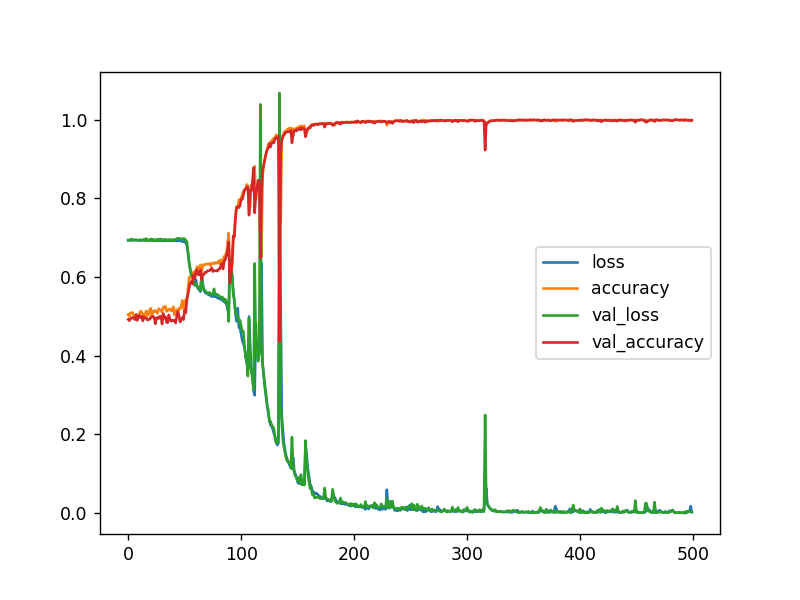

<AxesSubplot:>

In [72]:
pd.DataFrame(gru_l_30.history).plot()

### Conclusion: sequence length 30 and long distance
- simple ANN again not good
- SimpleRNN also performed badly
- LSTM reduced its performance till 62%. It may be improved if epochs are increased.
- this time we raised epochs for GRU till 500, and its performance incresed drastically. 99%


 <a id = 'llrs30'></a>

# LSTM with return_sequence = True


- in last case, LSTM came up with 62% accuracy
- lets see , if it improves with return_sequence = True
- with return_sequence , there would be T hidden states at output, so we would need maxpool1d to get the best performing hidden state.

In [87]:
i = Input(shape = (T,D))
x = SimpleRNN(5, return_sequences= True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation = 'sigmoid')(x)

model_rnn = Model(i,x)
model_rnn.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_rnn.summary()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 30, 1)]           0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 30, 5)             35        
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 5)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [88]:
rnn_l_30_rs = model_rnn.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 6s 47ms/step - loss: 0.7045 - accuracy: 0.4998 - val_loss: 0.6924 - val_accuracy: 0.5073
Epoch 2/100
110/110 [==============================] - 5s 43ms/step - loss: 0.6913 - accuracy: 0.5277 - val_loss: 0.6920 - val_accuracy: 0.5227
Epoch 3/100
110/110 [==============================] - 5s 47ms/step - loss: 0.6824 - accuracy: 0.5535 - val_loss: 0.6807 - val_accuracy: 0.5600
Epoch 4/100
110/110 [==============================] - 5s 45ms/step - loss: 0.6748 - accuracy: 0.5868 - val_loss: 0.6858 - val_accuracy: 0.5393
Epoch 5/100
110/110 [==============================] - 5s 49ms/step - loss: 0.6857 - accuracy: 0.5450 - val_loss: 0.6790 - val_accuracy: 0.5753
Epoch 6/100
110/110 [==============================] - 5s 46ms/step - loss: 0.6813 - accuracy: 0.5741 - val_loss: 0.6751 - val_accuracy: 0.5927
Epoch 7/100
110/110 [==============================] - 5s 46ms/step - loss: 0.6771 - accuracy: 0.5815 - val_loss: 0.6693 - val_accuracy:

<IPython.core.display.Javascript object>


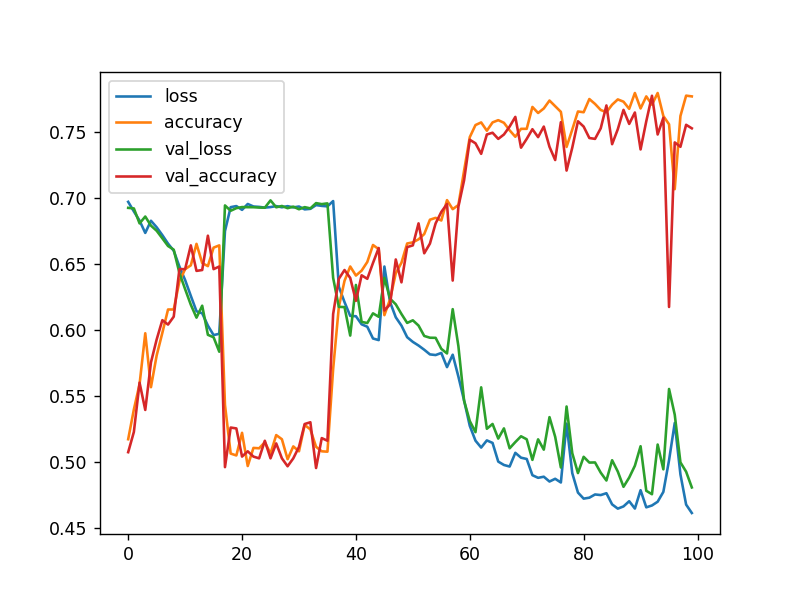

<AxesSubplot:>

In [89]:
pd.DataFrame(rnn_l_30_rs.history).plot()

In [73]:
i = Input(shape = (T,D))
x = LSTM(5, return_sequences= True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation = 'sigmoid')(x)

model_lstm = Model(i,x)
model_lstm.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_lstm.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 30, 1)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 5)             140       
_________________________________________________________________
global_max_pooling1d (Global (None, 5)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [74]:
lstm_l_30_rs = model_lstm.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 3s 11ms/step - loss: 0.6957 - accuracy: 0.5002 - val_loss: 0.6925 - val_accuracy: 0.5307
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.4997 - val_loss: 0.6926 - val_accuracy: 0.5160
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6904 - accuracy: 0.5353 - val_loss: 0.6871 - val_accuracy: 0.5567
Epoch 4/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6892 - accuracy: 0.5442 - val_loss: 0.6898 - val_accuracy: 0.5307
Epoch 5/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6902 - accuracy: 0.5364 - val_loss: 0.6836 - val_accuracy: 0.5353
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6884 - accuracy: 0.5293 - val_loss: 0.6822 - val_accuracy: 0.5793
Epoch 7/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6901 - accuracy: 0.5232 - val_loss: 0.6869 - val_accuracy: 0.546

Epoch 58/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5890 - accuracy: 0.7051 - val_loss: 0.5777 - val_accuracy: 0.7107
Epoch 59/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5644 - accuracy: 0.7334 - val_loss: 0.5700 - val_accuracy: 0.7453
Epoch 60/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5411 - accuracy: 0.7513 - val_loss: 0.5544 - val_accuracy: 0.7360
Epoch 61/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5090 - accuracy: 0.7855 - val_loss: 0.5287 - val_accuracy: 0.7707
Epoch 62/100
110/110 [==============================] - 1s 8ms/step - loss: 0.4950 - accuracy: 0.7808 - val_loss: 0.5718 - val_accuracy: 0.7173
Epoch 63/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5739 - accuracy: 0.7071 - val_loss: 0.5672 - val_accuracy: 0.6913
Epoch 64/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5530 - accuracy: 0.7046 - val_loss: 0.5755 - val_accuracy:

<IPython.core.display.Javascript object>


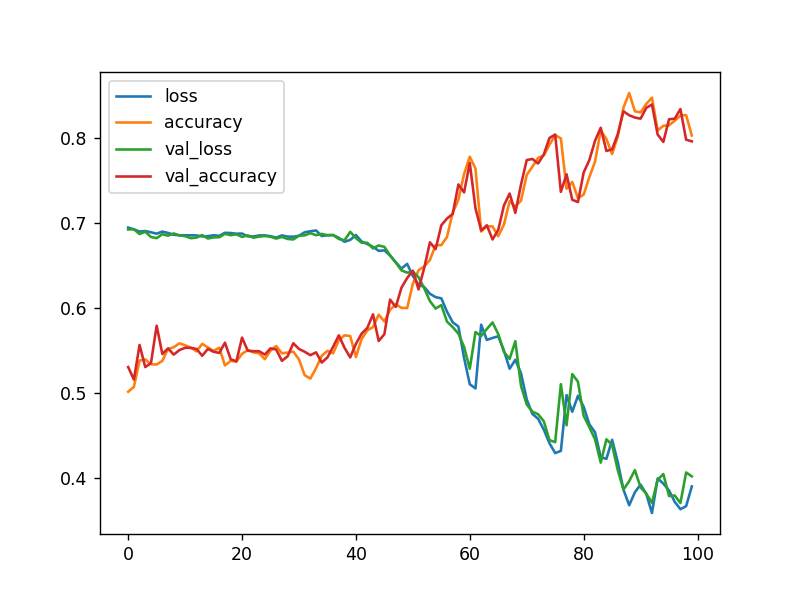

<AxesSubplot:>

In [75]:
pd.DataFrame(lstm_l_30_rs.history).plot()

In [81]:
i = Input(shape = (T,D))
x = GRU(5, return_sequences= True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation = 'sigmoid')(x)

model_gru = Model(i,x)
model_gru.compile(loss= 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics=['accuracy'])

model_gru.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 30, 1)]           0         
_________________________________________________________________
gru_7 (GRU)                  (None, 30, 5)             120       
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 5)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 6         
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [82]:
gru_l_30_rs = model_gru.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 2s 10ms/step - loss: 0.7073 - accuracy: 0.4988 - val_loss: 0.6967 - val_accuracy: 0.5013
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6948 - accuracy: 0.4985 - val_loss: 0.6998 - val_accuracy: 0.5027
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6950 - accuracy: 0.4908 - val_loss: 0.6950 - val_accuracy: 0.4927
Epoch 4/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5013 - val_loss: 0.6943 - val_accuracy: 0.5020
Epoch 5/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.5067 - val_loss: 0.6937 - val_accuracy: 0.4980
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6914 - accuracy: 0.5249 - val_loss: 0.6944 - val_accuracy: 0.5067
Epoch 7/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6949 - accuracy: 0.5045 - val_loss: 0.6937 - val_accuracy: 0.492

Epoch 58/100
110/110 [==============================] - 1s 8ms/step - loss: 0.3013 - accuracy: 0.8348 - val_loss: 0.2667 - val_accuracy: 0.8553
Epoch 59/100
110/110 [==============================] - 1s 7ms/step - loss: 0.2731 - accuracy: 0.8422 - val_loss: 0.2571 - val_accuracy: 0.8660
Epoch 60/100
110/110 [==============================] - 1s 8ms/step - loss: 0.2741 - accuracy: 0.8460 - val_loss: 0.2464 - val_accuracy: 0.8640
Epoch 61/100
110/110 [==============================] - 1s 7ms/step - loss: 0.2655 - accuracy: 0.8575 - val_loss: 0.2388 - val_accuracy: 0.8660
Epoch 62/100
110/110 [==============================] - 1s 7ms/step - loss: 0.2538 - accuracy: 0.8525 - val_loss: 0.2349 - val_accuracy: 0.8680
Epoch 63/100
110/110 [==============================] - 1s 7ms/step - loss: 0.2506 - accuracy: 0.8596 - val_loss: 0.2366 - val_accuracy: 0.8667
Epoch 64/100
110/110 [==============================] - 1s 8ms/step - loss: 0.2548 - accuracy: 0.8611 - val_loss: 0.2314 - val_accuracy:

<IPython.core.display.Javascript object>


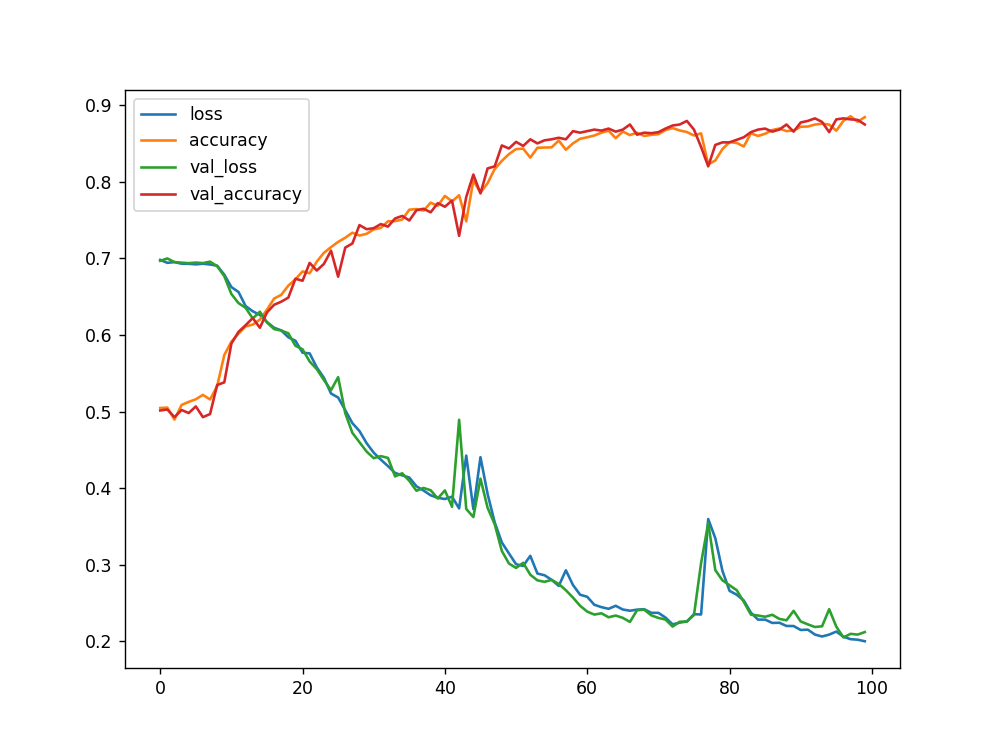

<AxesSubplot:>

In [83]:
pd.DataFrame(gru_l_30_rs.history).plot()

### Conlcusions: return_sequences = True with globalmaxpool1d
- this raises the accuracy for all the models.
- even gru with less epochs (100) were able to show good results. around 90%
- LSTM which were at 62%, now showing 82%
- even simpleRNN reached till 75%

# Final conlusions

- There are several ways RNN problems can be approached.

- SimpleRNN
    - It is good for short distance patterns and not promising results for long distance or uneven patterns.
- LSTM 
    - It is one of the best approach for long distance data, but that also goes down when timesteps are big( more than 30 in above case)
    - But using it with return_sequence and globalmaxpool1d would give stable results.
- GRU
    - GRU are also efficient option for long distance data
    - But it has one drawback, that it takes more time to learn. and Epochs need to be at higher end if you want your GPU perfomring at best.
    - However, this also raises its efficiency when used with return_sequence and globalmaxpool1d.


# Any model with return_sequence and globalmaxpool1d raises its level.

--------------------


 <a id = 'ul30'></a>

# Uneven patterns

### Changing the patterns at different location

In [2]:
# we are building the dataset:
# This is nonlinear and long-distance patterns


# lets start with timestep as 10, later we may increase it to see how long NN 
# is able to learn the variations.


T = 30
D = 1       # feature
X = []
Y = []


# below code is written to create the patterns in the data.
# only last 3 items in each timesteps has the pattern, hence short distance
# later for long distance, firt 3 items will create the pattern.

def get_label(x, i1,i2,i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0


for t in range(5000):
    x = np.random.randn(T)
    X.append(x)  
#     y = get_label(x, -1,-2,-3)   # pattern at short distance
#     y = get_label(x, 0, 1, 2 )   # pattern at long distance
    y = get_label(x, 2, 5, 9 )
    
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape, Y.shape)
    

(5000, 30) (5000,)


In [4]:
i = Input(shape = (T,D))
x = LSTM(5)(i)

x = Dense(1, activation= 'sigmoid')(x)

model_lstm = Model(i,x)

model_lstm.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=0.01),
            metrics=['accuracy']
             )
model_lstm.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [5]:
#up - uneven patterns

lstm_30_up = model_lstm.fit(X,Y,epochs = 100,
             validation_split=0.3) 

Epoch 1/100
110/110 [==============================] - 4s 15ms/step - loss: 0.6953 - accuracy: 0.5044 - val_loss: 0.6951 - val_accuracy: 0.5073
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6948 - accuracy: 0.4829 - val_loss: 0.6967 - val_accuracy: 0.4840
Epoch 3/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6914 - accuracy: 0.5149 - val_loss: 0.6936 - val_accuracy: 0.4807
Epoch 4/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6919 - accuracy: 0.5285 - val_loss: 0.6930 - val_accuracy: 0.5047
Epoch 5/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6924 - accuracy: 0.5187 - val_loss: 0.6953 - val_accuracy: 0.4747
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6918 - accuracy: 0.5248 - val_loss: 0.6947 - val_accuracy: 0.4940
Epoch 7/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6925 - accuracy: 0.5063 - val_loss: 0.6946 - val_accuracy: 0.494

Epoch 58/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6582 - accuracy: 0.5970 - val_loss: 0.7344 - val_accuracy: 0.4907
Epoch 59/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6618 - accuracy: 0.6003 - val_loss: 0.7350 - val_accuracy: 0.5013
Epoch 60/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6617 - accuracy: 0.5987 - val_loss: 0.7337 - val_accuracy: 0.5060
Epoch 61/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6639 - accuracy: 0.5810 - val_loss: 0.7373 - val_accuracy: 0.5060
Epoch 62/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6543 - accuracy: 0.6088 - val_loss: 0.7425 - val_accuracy: 0.4987
Epoch 63/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6641 - accuracy: 0.5819 - val_loss: 0.7401 - val_accuracy: 0.4940
Epoch 64/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6581 - accuracy: 0.5965 - val_loss: 0.7460 - val_accuracy:

<AxesSubplot:>

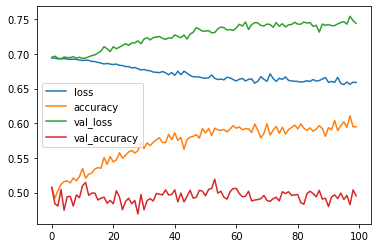

In [7]:
pd.DataFrame(lstm_30_up.history).plot()

#### Accurany not showing promising results -  it is just 60% and validation at 50%

### Lets try same with return_sequence = True

In [9]:
i = Input(shape = (T,D))
x = LSTM(5, return_sequences = True)(i)

x = GlobalMaxPool1D()(x)

x = Dense(1, activation= 'sigmoid')(x)

model_lstm_ = Model(i,x)

model_lstm_.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=0.01),
            metrics=['accuracy']
             )
model_lstm_.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 5)             140       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [10]:
lstm_30_up_ = model_lstm_.fit(X,Y,epochs = 100,
             validation_split=0.3) 

Epoch 1/100
110/110 [==============================] - 3s 11ms/step - loss: 0.6938 - accuracy: 0.5166 - val_loss: 0.6940 - val_accuracy: 0.4907
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.5168 - val_loss: 0.6940 - val_accuracy: 0.4820
Epoch 3/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6926 - accuracy: 0.5121 - val_loss: 0.6936 - val_accuracy: 0.4947
Epoch 4/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6916 - accuracy: 0.5148 - val_loss: 0.6943 - val_accuracy: 0.4893
Epoch 5/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6908 - accuracy: 0.5220 - val_loss: 0.7005 - val_accuracy: 0.4900
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6950 - accuracy: 0.5101 - val_loss: 0.6950 - val_accuracy: 0.4940
Epoch 7/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6906 - accuracy: 0.5189 - val_loss: 0.6939 - val_accuracy: 0.514

Epoch 58/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6752 - accuracy: 0.5677 - val_loss: 0.7028 - val_accuracy: 0.4993
Epoch 59/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6757 - accuracy: 0.5758 - val_loss: 0.7051 - val_accuracy: 0.5073
Epoch 60/100
110/110 [==============================] - ETA: 0s - loss: 0.6767 - accuracy: 0.55 - 1s 8ms/step - loss: 0.6767 - accuracy: 0.5555 - val_loss: 0.7076 - val_accuracy: 0.4953
Epoch 61/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6772 - accuracy: 0.5727 - val_loss: 0.7055 - val_accuracy: 0.5093
Epoch 62/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6799 - accuracy: 0.5527 - val_loss: 0.7012 - val_accuracy: 0.5213
Epoch 63/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6720 - accuracy: 0.5657 - val_loss: 0.7039 - val_accuracy: 0.5093
Epoch 64/100
110/110 [==============================] - 1s 8ms/step - loss: 0.6747 - accuracy:

In [ ]:
pd.DataFrame(lstm_30_up_.history).plot()

### Lets try same with more epochs

In [12]:
i = Input(shape = (T,D))
x = LSTM(5, return_sequences = True)(i)

x = GlobalMaxPool1D()(x)

x = Dense(1, activation= 'sigmoid')(x)

model_lstm_ = Model(i,x)

model_lstm_.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=0.01),
            metrics=['accuracy']
             )
model_lstm_.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 5)             140       
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [13]:
lstm_30_up_ = model_lstm_.fit(X,Y,epochs = 300,
             validation_split=0.3) 

Epoch 1/300
110/110 [==============================] - 3s 10ms/step - loss: 0.6958 - accuracy: 0.5011 - val_loss: 0.6935 - val_accuracy: 0.4887
Epoch 2/300
110/110 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.4978 - val_loss: 0.6933 - val_accuracy: 0.5133
Epoch 3/300
110/110 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.5021 - val_loss: 0.6936 - val_accuracy: 0.4753
Epoch 4/300
110/110 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6937 - val_accuracy: 0.4967
Epoch 5/300
110/110 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5161 - val_loss: 0.6950 - val_accuracy: 0.4880
Epoch 6/300
110/110 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.5176 - val_loss: 0.6937 - val_accuracy: 0.5007
Epoch 7/300
110/110 [==============================] - 1s 7ms/step - loss: 0.6921 - accuracy: 0.5254 - val_loss: 0.6953 - val_accuracy: 0.486

Epoch 58/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6854 - accuracy: 0.5603 - val_loss: 0.6968 - val_accuracy: 0.4900
Epoch 59/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6867 - accuracy: 0.5467 - val_loss: 0.6972 - val_accuracy: 0.5027
Epoch 60/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6839 - accuracy: 0.5564 - val_loss: 0.6974 - val_accuracy: 0.4967
Epoch 61/300
110/110 [==============================] - 1s 9ms/step - loss: 0.6819 - accuracy: 0.5673 - val_loss: 0.6939 - val_accuracy: 0.5047
Epoch 62/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6869 - accuracy: 0.5472 - val_loss: 0.6981 - val_accuracy: 0.5027
Epoch 63/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6853 - accuracy: 0.5532 - val_loss: 0.6977 - val_accuracy: 0.4987
Epoch 64/300
110/110 [==============================] - 1s 10ms/step - loss: 0.6848 - accuracy: 0.5532 - val_loss: 0.6975 - val_accuracy

Epoch 115/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6705 - accuracy: 0.5806 - val_loss: 0.7066 - val_accuracy: 0.4973
Epoch 116/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6698 - accuracy: 0.5906 - val_loss: 0.7048 - val_accuracy: 0.5100
Epoch 117/300
110/110 [==============================] - 1s 9ms/step - loss: 0.6721 - accuracy: 0.5676 - val_loss: 0.7059 - val_accuracy: 0.5047
Epoch 118/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6725 - accuracy: 0.5784 - val_loss: 0.7064 - val_accuracy: 0.5080
Epoch 119/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6703 - accuracy: 0.5836 - val_loss: 0.7048 - val_accuracy: 0.5113
Epoch 120/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6725 - accuracy: 0.5729 - val_loss: 0.7036 - val_accuracy: 0.5140
Epoch 121/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6619 - accuracy: 0.6065 - val_loss: 0.7058 - val_ac

110/110 [==============================] - 1s 9ms/step - loss: 0.6793 - accuracy: 0.5600 - val_loss: 0.7244 - val_accuracy: 0.4887
Epoch 172/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6679 - accuracy: 0.5770 - val_loss: 0.7200 - val_accuracy: 0.4887
Epoch 173/300
110/110 [==============================] - 1s 9ms/step - loss: 0.6726 - accuracy: 0.5855 - val_loss: 0.7129 - val_accuracy: 0.5040
Epoch 174/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6671 - accuracy: 0.5824 - val_loss: 0.7169 - val_accuracy: 0.5013
Epoch 175/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6615 - accuracy: 0.5982 - val_loss: 0.7164 - val_accuracy: 0.5080
Epoch 176/300
110/110 [==============================] - 1s 10ms/step - loss: 0.6660 - accuracy: 0.5908 - val_loss: 0.7212 - val_accuracy: 0.4947
Epoch 177/300
110/110 [==============================] - 1s 9ms/step - loss: 0.6641 - accuracy: 0.5917 - val_loss: 0.7194 - val_accuracy: 0.497

110/110 [==============================] - 1s 8ms/step - loss: 0.6584 - accuracy: 0.6123 - val_loss: 0.7238 - val_accuracy: 0.4940
Epoch 228/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6581 - accuracy: 0.5978 - val_loss: 0.7222 - val_accuracy: 0.5087
Epoch 229/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6582 - accuracy: 0.6186 - val_loss: 0.7174 - val_accuracy: 0.5093
Epoch 230/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6699 - accuracy: 0.5973 - val_loss: 0.7255 - val_accuracy: 0.5020
Epoch 231/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6543 - accuracy: 0.6292 - val_loss: 0.7245 - val_accuracy: 0.5053
Epoch 232/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6776 - accuracy: 0.5757 - val_loss: 0.7228 - val_accuracy: 0.4933
Epoch 233/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6667 - accuracy: 0.5983 - val_loss: 0.7182 - val_accuracy: 0.4973

110/110 [==============================] - 1s 9ms/step - loss: 0.6512 - accuracy: 0.6149 - val_loss: 0.7263 - val_accuracy: 0.4953
Epoch 284/300
110/110 [==============================] - 1s 9ms/step - loss: 0.6566 - accuracy: 0.6122 - val_loss: 0.7205 - val_accuracy: 0.5220
Epoch 285/300
110/110 [==============================] - 1s 9ms/step - loss: 0.6655 - accuracy: 0.5897 - val_loss: 0.7227 - val_accuracy: 0.4947
Epoch 286/300
110/110 [==============================] - 1s 9ms/step - loss: 0.6577 - accuracy: 0.6079 - val_loss: 0.7237 - val_accuracy: 0.5033
Epoch 287/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6592 - accuracy: 0.6017 - val_loss: 0.7255 - val_accuracy: 0.4987
Epoch 288/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6574 - accuracy: 0.6143 - val_loss: 0.7219 - val_accuracy: 0.5053
Epoch 289/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6574 - accuracy: 0.6154 - val_loss: 0.7210 - val_accuracy: 0.5007

<AxesSubplot:>

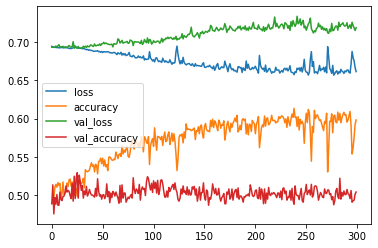

In [14]:
pd.DataFrame(lstm_30_up_.history).plot()

# GRU

In [16]:

i = Input(shape = (T,D))
x = GRU(5, return_sequences = True)(i)

x = GlobalMaxPool1D()(x)

x = Dense(1, activation= 'sigmoid')(x)

model_gru_ = Model(i,x)

model_gru_.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=0.01),
            metrics=['accuracy']
             )
model_gru_.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 30, 5)             120       
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [17]:
gru_30_up_ = model_gru_.fit(X,Y,epochs = 300,
             validation_split=0.3) 

Epoch 1/300
110/110 [==============================] - 3s 15ms/step - loss: 0.6981 - accuracy: 0.4967 - val_loss: 0.6935 - val_accuracy: 0.4993
Epoch 2/300
110/110 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5101 - val_loss: 0.6936 - val_accuracy: 0.4960
Epoch 3/300
110/110 [==============================] - 1s 7ms/step - loss: 0.6927 - accuracy: 0.5186 - val_loss: 0.7009 - val_accuracy: 0.4867
Epoch 4/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6943 - accuracy: 0.5042 - val_loss: 0.6952 - val_accuracy: 0.4820
Epoch 5/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.5060 - val_loss: 0.6946 - val_accuracy: 0.4800
Epoch 6/300
110/110 [==============================] - 1s 7ms/step - loss: 0.6925 - accuracy: 0.5149 - val_loss: 0.6940 - val_accuracy: 0.4940
Epoch 7/300
110/110 [==============================] - 1s 7ms/step - loss: 0.6929 - accuracy: 0.5131 - val_loss: 0.6947 - val_accuracy: 0.472

Epoch 58/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6824 - accuracy: 0.5528 - val_loss: 0.7027 - val_accuracy: 0.4987
Epoch 59/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6812 - accuracy: 0.5613 - val_loss: 0.7109 - val_accuracy: 0.4727
Epoch 60/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6809 - accuracy: 0.5678 - val_loss: 0.7043 - val_accuracy: 0.5120
Epoch 61/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6817 - accuracy: 0.5617 - val_loss: 0.7059 - val_accuracy: 0.4860
Epoch 62/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6805 - accuracy: 0.5520 - val_loss: 0.7061 - val_accuracy: 0.4900
Epoch 63/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6782 - accuracy: 0.5673 - val_loss: 0.7057 - val_accuracy: 0.4853
Epoch 64/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6763 - accuracy: 0.5647 - val_loss: 0.7072 - val_accuracy:

Epoch 115/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6701 - accuracy: 0.5991 - val_loss: 0.7173 - val_accuracy: 0.4913
Epoch 116/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6903 - accuracy: 0.5432 - val_loss: 0.7054 - val_accuracy: 0.5047
Epoch 117/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6901 - accuracy: 0.5410 - val_loss: 0.7102 - val_accuracy: 0.4880
Epoch 118/300
110/110 [==============================] - 1s 9ms/step - loss: 0.6772 - accuracy: 0.5753 - val_loss: 0.7112 - val_accuracy: 0.4940
Epoch 119/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6796 - accuracy: 0.5659 - val_loss: 0.7173 - val_accuracy: 0.5047
Epoch 120/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6835 - accuracy: 0.5589 - val_loss: 0.7132 - val_accuracy: 0.4907
Epoch 121/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6755 - accuracy: 0.5824 - val_loss: 0.7223 - val_ac

110/110 [==============================] - 1s 9ms/step - loss: 0.6783 - accuracy: 0.5720 - val_loss: 0.7245 - val_accuracy: 0.4860
Epoch 172/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6715 - accuracy: 0.5914 - val_loss: 0.7209 - val_accuracy: 0.4880
Epoch 173/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6806 - accuracy: 0.5772 - val_loss: 0.7161 - val_accuracy: 0.4913
Epoch 174/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6621 - accuracy: 0.6023 - val_loss: 0.7178 - val_accuracy: 0.4900
Epoch 175/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6792 - accuracy: 0.5788 - val_loss: 0.7220 - val_accuracy: 0.4927
Epoch 176/300
110/110 [==============================] - 1s 9ms/step - loss: 0.6688 - accuracy: 0.5815 - val_loss: 0.7213 - val_accuracy: 0.4940
Epoch 177/300
110/110 [==============================] - 1s 9ms/step - loss: 0.6706 - accuracy: 0.5947 - val_loss: 0.7148 - val_accuracy: 0.5087

110/110 [==============================] - 1s 8ms/step - loss: 0.6657 - accuracy: 0.5981 - val_loss: 0.7170 - val_accuracy: 0.5060
Epoch 228/300
110/110 [==============================] - 1s 10ms/step - loss: 0.6655 - accuracy: 0.5869 - val_loss: 0.7177 - val_accuracy: 0.5100
Epoch 229/300
110/110 [==============================] - 1s 9ms/step - loss: 0.6665 - accuracy: 0.5944 - val_loss: 0.7222 - val_accuracy: 0.4900
Epoch 230/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6598 - accuracy: 0.6105 - val_loss: 0.7211 - val_accuracy: 0.4847
Epoch 231/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6635 - accuracy: 0.6039 - val_loss: 0.7215 - val_accuracy: 0.4920
Epoch 232/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6646 - accuracy: 0.6056 - val_loss: 0.7168 - val_accuracy: 0.5140
Epoch 233/300
110/110 [==============================] - 1s 8ms/step - loss: 0.6665 - accuracy: 0.6011 - val_loss: 0.7244 - val_accuracy: 0.493

110/110 [==============================] - 1s 10ms/step - loss: 0.6668 - accuracy: 0.5987 - val_loss: 0.7183 - val_accuracy: 0.5060
Epoch 284/300
110/110 [==============================] - 1s 10ms/step - loss: 0.6731 - accuracy: 0.5940 - val_loss: 0.7209 - val_accuracy: 0.5007
Epoch 285/300
110/110 [==============================] - 1s 11ms/step - loss: 0.6645 - accuracy: 0.6003 - val_loss: 0.7236 - val_accuracy: 0.4993
Epoch 286/300
110/110 [==============================] - 1s 10ms/step - loss: 0.6661 - accuracy: 0.5919 - val_loss: 0.7249 - val_accuracy: 0.4967
Epoch 287/300
110/110 [==============================] - 1s 10ms/step - loss: 0.6678 - accuracy: 0.5982 - val_loss: 0.7145 - val_accuracy: 0.4973
Epoch 288/300
110/110 [==============================] - 1s 10ms/step - loss: 0.6674 - accuracy: 0.5921 - val_loss: 0.7147 - val_accuracy: 0.5087
Epoch 289/300
110/110 [==============================] - 1s 10ms/step - loss: 0.6603 - accuracy: 0.5975 - val_loss: 0.7189 - val_accuracy:

<AxesSubplot:>

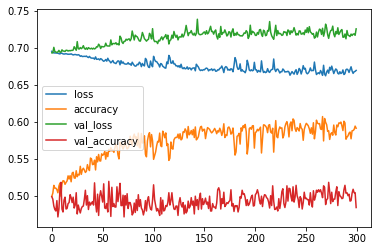

In [18]:
pd.DataFrame(gru_30_up_.history).plot()

##### GRU also 60%. Results are not fine for uneven pattern data

#### lets try adding more layers

In [21]:

i = Input(shape = (T,D))

x = GRU(5, return_sequences = True)(i)
x = GRU(5, return_sequences = True)(x)
x = GRU(5, return_sequences = True)(x)

x = GlobalMaxPool1D()(x)

x = Dense(1, activation= 'sigmoid')(x)

model_gru_3l = Model(i,x)

model_gru_3l.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=0.01),
            metrics=['accuracy']
             )
model_gru_3l.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 30, 1)]           0         
_________________________________________________________________
gru_8 (GRU)                  (None, 30, 5)             120       
_________________________________________________________________
gru_9 (GRU)                  (None, 30, 5)             180       
_________________________________________________________________
gru_10 (GRU)                 (None, 30, 5)             180       
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 5)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 486
Trainable params: 486
Non-trainable params: 0
_____________________________________________________________

In [22]:
gru_30_up_3l = model_gru_3l.fit(X,Y,epochs = 300,
             validation_split=0.3) 

Epoch 1/300
110/110 [==============================] - 7s 21ms/step - loss: 0.6951 - accuracy: 0.5081 - val_loss: 0.6937 - val_accuracy: 0.4867
Epoch 2/300
110/110 [==============================] - 1s 13ms/step - loss: 0.6934 - accuracy: 0.5045 - val_loss: 0.6929 - val_accuracy: 0.5133
Epoch 3/300
110/110 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5190 - val_loss: 0.6932 - val_accuracy: 0.4780
Epoch 4/300
110/110 [==============================] - 1s 13ms/step - loss: 0.6934 - accuracy: 0.5052 - val_loss: 0.6933 - val_accuracy: 0.4867
Epoch 5/300
110/110 [==============================] - 1s 13ms/step - loss: 0.6933 - accuracy: 0.5056 - val_loss: 0.6930 - val_accuracy: 0.5133
Epoch 6/300
110/110 [==============================] - 1s 13ms/step - loss: 0.6936 - accuracy: 0.4815 - val_loss: 0.6936 - val_accuracy: 0.4867
Epoch 7/300
110/110 [==============================] - 1s 13ms/step - loss: 0.6935 - accuracy: 0.4945 - val_loss: 0.6937 - val_accuracy:

110/110 [==============================] - 2s 15ms/step - loss: 0.6937 - accuracy: 0.4999 - val_loss: 0.6954 - val_accuracy: 0.4867
Epoch 58/300
110/110 [==============================] - 2s 14ms/step - loss: 0.6921 - accuracy: 0.4855 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 59/300
110/110 [==============================] - 2s 14ms/step - loss: 0.6925 - accuracy: 0.5024 - val_loss: 0.6937 - val_accuracy: 0.4987
Epoch 60/300
110/110 [==============================] - 2s 14ms/step - loss: 0.6929 - accuracy: 0.4954 - val_loss: 0.6933 - val_accuracy: 0.5007
Epoch 61/300
110/110 [==============================] - 2s 14ms/step - loss: 0.6923 - accuracy: 0.5146 - val_loss: 0.6934 - val_accuracy: 0.5127
Epoch 62/300
110/110 [==============================] - 2s 14ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6950 - val_accuracy: 0.4867
Epoch 63/300
110/110 [==============================] - 2s 14ms/step - loss: 0.6906 - accuracy: 0.5013 - val_loss: 0.6935 - val_accuracy: 0.486

110/110 [==============================] - 2s 14ms/step - loss: 0.6783 - accuracy: 0.5370 - val_loss: 0.6995 - val_accuracy: 0.5133
Epoch 114/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6848 - accuracy: 0.5387 - val_loss: 0.6949 - val_accuracy: 0.5167
Epoch 115/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6914 - accuracy: 0.5249 - val_loss: 0.6977 - val_accuracy: 0.5047
Epoch 116/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6861 - accuracy: 0.5462 - val_loss: 0.6994 - val_accuracy: 0.5007
Epoch 117/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6818 - accuracy: 0.5575 - val_loss: 0.6990 - val_accuracy: 0.5113
Epoch 118/300
110/110 [==============================] - 2s 14ms/step - loss: 0.6818 - accuracy: 0.5449 - val_loss: 0.7022 - val_accuracy: 0.5013
Epoch 119/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6789 - accuracy: 0.5638 - val_loss: 0.7025 - val_accuracy:

110/110 [==============================] - 2s 16ms/step - loss: 0.6630 - accuracy: 0.5814 - val_loss: 0.7133 - val_accuracy: 0.5080
Epoch 170/300
110/110 [==============================] - 2s 16ms/step - loss: 0.6710 - accuracy: 0.5599 - val_loss: 0.7104 - val_accuracy: 0.5120
Epoch 171/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6663 - accuracy: 0.5634 - val_loss: 0.7181 - val_accuracy: 0.5007
Epoch 172/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6751 - accuracy: 0.5793 - val_loss: 0.7198 - val_accuracy: 0.5067
Epoch 173/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6605 - accuracy: 0.5834 - val_loss: 0.7092 - val_accuracy: 0.5093
Epoch 174/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6688 - accuracy: 0.5648 - val_loss: 0.7205 - val_accuracy: 0.5100
Epoch 175/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6647 - accuracy: 0.5542 - val_loss: 0.7015 - val_accuracy:

110/110 [==============================] - 2s 18ms/step - loss: 0.6799 - accuracy: 0.5437 - val_loss: 0.7188 - val_accuracy: 0.5280
Epoch 226/300
110/110 [==============================] - 2s 16ms/step - loss: 0.7086 - accuracy: 0.5141 - val_loss: 0.7202 - val_accuracy: 0.4887
Epoch 227/300
110/110 [==============================] - 2s 15ms/step - loss: 0.7021 - accuracy: 0.5047 - val_loss: 0.7129 - val_accuracy: 0.4853
Epoch 228/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6998 - accuracy: 0.4884 - val_loss: 0.6946 - val_accuracy: 0.5273
Epoch 229/300
110/110 [==============================] - 2s 17ms/step - loss: 0.6940 - accuracy: 0.5039 - val_loss: 0.6952 - val_accuracy: 0.4973
Epoch 230/300
110/110 [==============================] - 2s 20ms/step - loss: 0.6929 - accuracy: 0.4974 - val_loss: 0.6961 - val_accuracy: 0.4920
Epoch 231/300
110/110 [==============================] - 2s 19ms/step - loss: 0.6922 - accuracy: 0.5005 - val_loss: 0.6956 - val_accuracy:

110/110 [==============================] - 2s 15ms/step - loss: 0.6738 - accuracy: 0.5654 - val_loss: 0.7149 - val_accuracy: 0.4967
Epoch 282/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6779 - accuracy: 0.5600 - val_loss: 0.7096 - val_accuracy: 0.5067
Epoch 283/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6740 - accuracy: 0.5555 - val_loss: 0.7044 - val_accuracy: 0.5053
Epoch 284/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6740 - accuracy: 0.5674 - val_loss: 0.7112 - val_accuracy: 0.5127
Epoch 285/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6677 - accuracy: 0.5770 - val_loss: 0.7271 - val_accuracy: 0.5093
Epoch 286/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6768 - accuracy: 0.5394 - val_loss: 0.7018 - val_accuracy: 0.5067
Epoch 287/300
110/110 [==============================] - 2s 15ms/step - loss: 0.6800 - accuracy: 0.5376 - val_loss: 0.6930 - val_accuracy:

<AxesSubplot:>

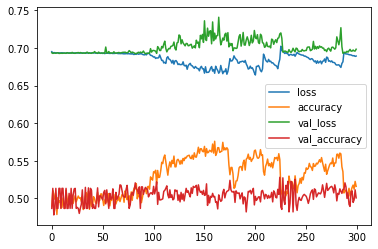

In [23]:
pd.DataFrame(gru_30_up_3l.history).plot()

# Conclusion with uneven patterns in data:
- it is difficult for LSTM and GRU to pick those patterns and make a solid model
- Even with multiple layers it is not showing results.